# Exploratory Data Analysis of Video Game Review Information from Steam
This step explores video game information and corresponding user reviews through Valve's Steam digital distribution company and supporting websites.

In [1]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import stopwords, words
setofwords = set(words.words())
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ggibs\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ggibs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
path_steam = "C:/users/ggibs/steam_game_recommender"
path_interim = os.path.join(path_steam, "data/interim/")
path_external = os.path.join(path_steam, "data/external/")

## Import Video Game Information

In [3]:
app_list = pd.read_csv(os.path.join(path_external, "app_list.csv"), index_col="appid")

In [4]:
app_list.head()

,name
appid,
10,Counter-Strike
20,Team Fortress Classic
30,Day of Defeat
40,Deathmatch Classic
50,Half-Life: Opposing Force


In [5]:
# 1,000 video game titles
app_list.index

Int64Index([     10,      20,      30,      40,      50,      60,      70,
                 80,     130,     220,
            ...
            1172620, 1174180, 1180380, 1190460, 1213210, 1226470, 1237970,
            1284410, 1286830, 1289310],
           dtype='int64', name='appid', length=1000)

In [4]:
steamspy_data = pd.read_csv(os.path.join(path_external, "steamspy_data.csv"), index_col=[0])

In [7]:
# SteamSpy data has developer and genre
steamspy_data.head()

,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
appid,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,Valve,Valve,NaN,162672,4258,0,"10,000,000 .. 20,000,000",9688,148,218,118,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,15656,"{'Action': 5325, 'FPS': 4728, 'Multiplayer': 3..."
20,Team Fortress Classic,Valve,Valve,NaN,4458,783,0,"2,000,000 .. 5,000,000",711,0,13,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,90,"{'Action': 734, 'FPS': 298, 'Multiplayer': 252..."
30,Day of Defeat,Valve,Valve,NaN,4389,488,0,"5,000,000 .. 10,000,000",948,0,20,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,160,"{'FPS': 777, 'World War II': 243, 'Multiplayer..."
40,Deathmatch Classic,Valve,Valve,NaN,1609,353,0,"5,000,000 .. 10,000,000",25,0,5,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,10,"{'Action': 625, 'FPS': 134, 'Classic': 103, 'M..."
50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,9295,491,0,"5,000,000 .. 10,000,000",188,20,85,20,499,499,0,"English, French, German, Korean",Action,96,"{'FPS': 870, 'Action': 311, 'Classic': 238, 'S..."


In [8]:
steamspy_data.index

Int64Index([     10,      20,      30,      40,      50,      60,      70,
                 80,     130,     220,
            ...
            1172620, 1174180, 1180380, 1190460, 1213210, 1226470, 1237970,
            1284410, 1286830, 1289310],
           dtype='int64', name='appid', length=1000)

## Import Video Game Reviews

In [5]:
reviews_df = pd.read_csv(os.path.join(path_interim, "reviews.csv"), index_col=[0,1], low_memory=False).sort_index()

In [10]:
reviews_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3753726 entries, (10, 34977170) to (1289310, 76312449)
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   language                        3753726 non-null  object 
 1   review                          3746757 non-null  object 
 2   timestamp_created               3753726 non-null  int64  
 3   timestamp_updated               3753726 non-null  int64  
 4   voted_up                        3753726 non-null  bool   
 5   votes_up                        3753726 non-null  int64  
 6   votes_funny                     3753726 non-null  int64  
 7   weighted_vote_score             3753726 non-null  float64
 8   comment_count                   3753726 non-null  int64  
 9   steam_purchase                  3753726 non-null  bool   
 10  received_for_free               3753726 non-null  bool   
 11  written_during_early_access     375372

In [11]:
reviews_df.index.names

FrozenList(['appid', 'recommendationid'])

In [12]:
# 748 game tiles met the download critera
reviews_df.index.levels[0]

Int64Index([     10,      20,      30,      40,      50,      60,      70,
                 80,     130,     220,
            ...
            1151340, 1172380, 1172620, 1174180, 1190460, 1213210, 1226470,
            1237970, 1286830, 1289310],
           dtype='int64', name='appid', length=748)

In [13]:
reviews_df.head()

language  \
appid recommendationid            
10    34977170          english   
      34978487          english   
      34980761          english   
      34985180          english   
      34988516          english   

                                                                   review  \
appid recommendationid                                                      
10    34977170                                                  good game   
      34978487                     classic old school game + :steamhappy:   
      34980761          Servidores broken por exemplo: Dou Ctrl+tiro d...   
      34985180          \nBefore I played:\n＼＼ ＿\n　　 ＼( ͡° ͜ʖ ͡°) \n　　...   
      34988516          Good game but sadly not much servers left in t...   

                        timestamp_created  timestamp_updated  voted_up  \
appid recommendationid                                                   
10    34977170                 1505496203         1505496203      True   
      34978487                 1505500384         1505500384      True   
      34980761                 1505507824         1505507824     False   
      34985180                 1505525745         1505525745      True   
      34988516                 1505540844         1514641638      True   

                        votes_up  votes_funny  weighted_vote_score  \
appid recommendationid                                               
10    34977170                 1            0             0.523810   
      34978487                 0            0             0.000000   
      34980761                 0            0             0.476423   
      34985180                 0            1             0.000000   
      34988516                 0            0             0.000000   

                        comment_count  steam_purchase  ...  \
appid recommendationid                                 ...   
10    34977170                      0            True  ...   
      34978487                      0            True  ...   
      34980761                      0            True  ...   
      34985180                      0            True  ...   
      34988516                      0            True  ...   

                        written_during_early_access     author.steamid  \
appid recommendationid                                                   
10    34977170                                False  76561198411856225   
      34978487                                False  76561198230410328   
      34980761                                False  76561198213606925   
      34985180                                False  76561198319303472   
      34988516                                False  76561198340225395   

                        author.num_games_owned  author.num_reviews  \
appid recommendationid                                               
10    34977170                              29                   2   
      34978487                              13                   7   
      34980761                             106                  13   
      34985180                             239                 156   
      34988516                              58                  31   

                        author.playtime_forever  \
appid recommendationid                            
10    34977170                         129549.0   
      34978487                          90881.0   
      34980761                           7081.0   
      34985180                            253.0   
      34988516                           5354.0   

                        author.playtime_last_two_weeks  \
appid recommendationid                                   
10    34977170                                     0.0   
      34978487                                    39.0   
      34980761                                   180.0   
      34985180                                     0.0   
      34988516                                     0.0   

                 

In [6]:
# Delete blanks, duplicates, last two columns
reviews_df.drop(['timestamp_dev_responded','developer_response'], axis=1, inplace=True)
reviews_df.dropna(subset = ['review'], inplace=True)
reviews_df = reviews_df[~reviews_df.index.duplicated(keep='first')]


In [18]:
reviews_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3264320 entries, (10, 34977170) to (1289310, 76312449)
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   language                        3264320 non-null  object 
 1   review                          3264320 non-null  object 
 2   timestamp_created               3264320 non-null  int64  
 3   timestamp_updated               3264320 non-null  int64  
 4   voted_up                        3264320 non-null  bool   
 5   votes_up                        3264320 non-null  int64  
 6   votes_funny                     3264320 non-null  int64  
 7   weighted_vote_score             3264320 non-null  float64
 8   comment_count                   3264320 non-null  int64  
 9   steam_purchase                  3264320 non-null  bool   
 10  received_for_free               3264320 non-null  bool   
 11  written_during_early_access     326432

## The Players

In [48]:
print("Average number of Steam games owned:  ", reviews_df['author.num_games_owned'].mean())
print("Average player total minutes of playtime:  ", reviews_df['author.playtime_forever'].mean())
print("Average player playtime last two weeks:  ", reviews_df['author.playtime_last_two_weeks'].mean())
print("Average player playtime at review:  ", reviews_df['author.playtime_at_review'].mean())

Average number of Steam games owned:   128.46120172041958
Average player total minutes of playtime:   16387.024230303075
Average player playtime last two weeks:   204.1406281594553
Average player playtime at review:   10803.955064394871


In [11]:
# User review counts
reviews_df['author.steamid'].value_counts()

76561197993023804    125
76561198315585536    121
76561198062813911    108
76561198101732759    104
76561198082610824     98
                    ... 
76561198269044983      1
76561198873043192      1
76561198336178427      1
76561198004816125      1
76561199000977408      1
Name: author.steamid, Length: 2324565, dtype: int64

In [19]:
user_grouped = reviews_df.groupby('author.steamid')
user_counts = user_grouped['author.steamid'].count()

In [20]:
# Players with only one review
user_counts[user_counts==1].count()

1832307

In [17]:
# Players with more than one review
user_counts[user_counts>1].count()

492258

In [16]:
# Players with five or more reviews
user_counts[user_counts>=5].count()

50129

In [15]:
# Players with three or more reviews
user_counts[user_counts>=3].count()

182631

In [18]:
# Players with three reviews
user_counts[user_counts==3].count()

93943

In [23]:
# Count of players per number of reviews given

dfReviewCounts = pd.DataFrame(columns=['ReviewsGiven', 'ReviewerCount'])

for i in range(1, 11):
    if i != 10:
        dfReviewCounts = dfReviewCounts.append({'ReviewsGiven': i, 'ReviewerCount': user_counts[user_counts==i].count()}, ignore_index=True)
    if i == 10:
        dfReviewCounts = dfReviewCounts.append({'ReviewsGiven': "10+", 'ReviewerCount': user_counts[user_counts>=10].count()}, ignore_index=True)

dfReviewCounts

,ReviewsGiven,ReviewerCount
0,1,1832307
1,2,309627
2,3,93943
3,4,38559
4,5,18699
5,6,10282
6,7,6384
7,8,3956
8,9,2711
9,10+,8097


Text(0.5, 1.0, '# of Video Game Reviews Posted by A User')

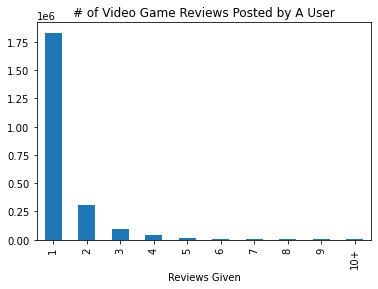

In [45]:
dfReviewCounts.plot(kind='bar', x='ReviewsGiven', xlabel='Reviews Given', legend=False)
plt.title("# of Video Game Reviews Posted by A User")

Text(0.5, 1.0, '3 or More Reviews Posted by A User')

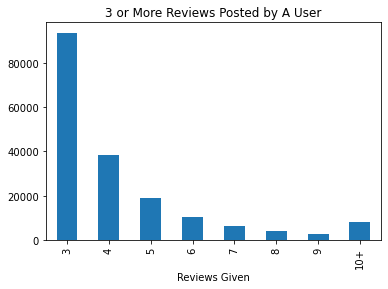

In [46]:
# Three or more reviews
dfReviewCounts.iloc[2:].plot(kind='bar', x='ReviewsGiven', xlabel='Reviews Given', legend=False)
plt.title("3 or More Reviews Posted by A User")

In [35]:
# Filter for three or more reviews
reviews_3up = reviews_df[reviews_df['author.steamid'].map(reviews_df['author.steamid'].value_counts()) >= 3]

In [22]:
# Up votes vs down votes
reviews_3up.voted_up.value_counts()

True     723843
False     88916
Name: voted_up, dtype: int64

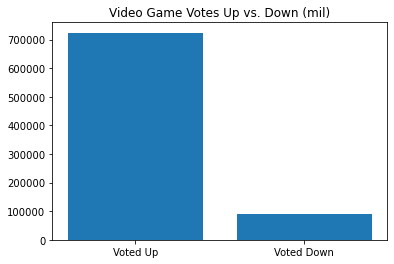

In [74]:
x = ["Voted Up", "Voted Down"]
y = [reviews_3up["voted_up"][reviews_3up["voted_up"] == True].count(), reviews_3up["voted_up"][reviews_3up["voted_up"] == False].count()]
plt.bar(x,y)
plt.title("Video Game Votes Up vs. Down (mil)")
plt.show()

## Games

In [36]:
reviews_3up.reset_index(inplace=True)
reviews_3up.set_index('appid', inplace=True)

In [37]:
# Merge reviews with SteamSpy game information
named_df = pd.merge(reviews_3up, steamspy_data, on='appid', how='left')
named_df.columns

Index(['recommendationid', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'author.steamid',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', 'name', 'developer',
       'publisher', 'score_rank', 'positive', 'negative', 'userscore',
       'owners', 'average_forever', 'average_2weeks', 'median_forever',
       'median_2weeks', 'price', 'initialprice', 'discount', 'languages',
       'genre', 'ccu', 'tags'],
      dtype='object')

In [107]:
# Games with most reviews
named_df['name'].value_counts().head(12)

Counter-Strike: Global Offensive     33950
Garry's Mod                          28686
Terraria                             28598
Halo: The Master Chief Collection    18376
Among Us                             15900
Portal 2                             14330
Left 4 Dead 2                        14067
DOOM Eternal                         13807
Fall Guys: Ultimate Knockout         13680
Fallout: New Vegas                   11811
Risk of Rain 2                       11446
Borderlands 2                        10878
Name: name, dtype: int64

<AxesSubplot:title={'center':'Top 20 Game Review Counts'}>

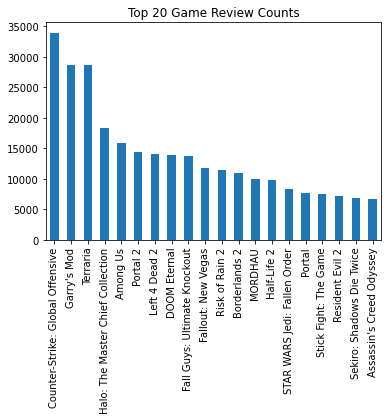

In [91]:
named_df["name"].value_counts().head(20).plot(kind='bar', title="Top 20 Game Review Counts")

In [10]:
named_df.reset_index(inplace=True)

In [11]:
named_group = named_df.groupby(["appid", "name"])

In [110]:
# Top games with ID
named_group.recommendationid.count().sort_values(ascending = False).head(20)

appid    name                             
730      Counter-Strike: Global Offensive     33950
4000     Garry's Mod                          28686
105600   Terraria                             28598
976730   Halo: The Master Chief Collection    18376
945360   Among Us                             15900
620      Portal 2                             14330
550      Left 4 Dead 2                        14067
782330   DOOM Eternal                         13807
1097150  Fall Guys: Ultimate Knockout         13680
22380    Fallout: New Vegas                   11811
632360   Risk of Rain 2                       11446
49520    Borderlands 2                        10878
629760   MORDHAU                               9954
220      Half-Life 2                           9748
1172380  STAR WARS Jedi: Fallen Order          8382
400      Portal                                7583
674940   Stick Fight: The Game                 7474
883710   Resident Evil 2                       7223
814380   Sekiro: Shad

In [12]:
game_counts = named_group.recommendationid.count()

In [55]:
# Number of games with 100+ reviews
game_counts[game_counts>=100].count()

498

In [13]:
games_100up = pd.DataFrame(game_counts[game_counts>=100])
games_100up.rename(columns={'recommendationid':'reviews'}, inplace=True)

In [15]:
# Separate counts of up and down votes
votes_up=named_df[named_df['voted_up'] == True].groupby(['appid', 'name']).agg(up=('recommendationid', 'count'))
votes_down =named_df[named_df['voted_up'] == False].groupby(['appid', 'name']).agg(down=('recommendationid', 'count'))

In [16]:
games_100up = games_100up.merge(votes_up, how = 'left', on = ['appid', 'name'])
games_100up = games_100up.merge(votes_down, how = 'left', on = ['appid', 'name'])

In [17]:
games_100up = games_100up.fillna(0)

In [18]:
games_100up["up_rate"] = games_100up.up / (games_100up.up + games_100up.down)

In [35]:
# Games with lowest percentage of up votes
games_100up[games_100up.up_rate < 0.50].sort_values("up_rate")

,,reviews,up,down,up_rate
appid,name,,,,
226700,Infestation: Survivor Stories 2020,107,18,89,0.168224
295110,Just Survive,569,138,431,0.242531
215280,Secret World Legends,158,59,99,0.373418
224540,Ace of Spades: Battle Builder,337,127,210,0.376855
424370,Wolcen: Lords of Mayhem,218,89,129,0.408257
1015500,WWE 2K20,165,70,95,0.424242
437220,The Culling,192,82,110,0.427083
834910,ATLAS,2509,1075,1434,0.428458
529180,Dark and Light,155,72,83,0.464516


In [36]:
# Highest rated games
games_100up.sort_values('up_rate', ascending=False).head(10)

,,reviews,up,down,up_rate
appid,name,,,,
620,Portal 2,14330,14148,182,0.987299
431960,Wallpaper Engine,291,287,4,0.986254
400,Portal,7583,7475,108,0.985758
427520,Factorio,108,106,2,0.981481
379720,DOOM,105,103,2,0.980952
312530,Duck Game,749,733,16,0.978638
250900,The Binding of Isaac: Rebirth,4868,4756,112,0.976993
294100,RimWorld,335,327,8,0.976119
519860,DUSK,2852,2783,69,0.975806


Text(0.5, 1.0, 'Video Game Ratio of Up Votes')

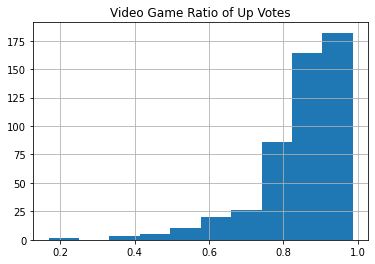

In [124]:
games_100up["up_rate"].hist()
plt.title("Video Game Ratio of Up Votes")

In [125]:
games_100up["up_rate"].mean()

0.8450854047389679

## Genres

In [38]:
reviews_3up.reset_index(inplace=True)
reviews_3up.set_index('appid', inplace=True)

In [39]:
reviews_3up["genre"] = ""

In [40]:
reviews_3up["genre"].update(steamspy_data["genre"])

In [22]:
reviews_3up.genre.value_counts()

Action                                                                        200896
Action, Adventure                                                             103421
Action, RPG                                                                    48165
Indie, Simulation                                                              46297
Strategy                                                                       38153
                                                                               ...  
Action, Free to Play, Indie, Massively Multiplayer, RPG                            1
Action, Adventure, Free to Play, Indie                                             1
Action, Casual, Free to Play, Indie, Simulation                                    1
Action, Free to Play, Strategy                                                     1
Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG         1
Name: genre, Length: 153, dtype: int64

In [131]:
# Review counts by genre (a game can be in multiple genres)
reviews_3up.genre.str.split(", ", expand=True).stack().value_counts()

Action                   591479
Indie                    245693
Adventure                233482
RPG                      171873
Simulation               113227
Strategy                 109447
Casual                    62097
Free to Play              46098
Massively Multiplayer     34768
Sports                    23785
Early Access              23323
Racing                    11483
Utilities                  1906
Audio Production           1615
                            472
Photo Editing               291
Animation & Modeling        291
Design & Illustration       291
dtype: int64

<AxesSubplot:title={'center':'Reviews by (Multiple) Genre'}>

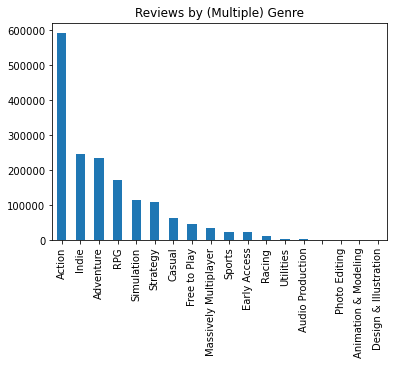

In [132]:
reviews_3up.genre.str.split(", ", expand=True).stack().value_counts().plot(kind='bar', title="Reviews by (Multiple) Genre")

In [41]:
# list of additional columns for individual genres
columns_add = ['Action', 'Indie', 'Adventure', 'RPG', 'Strategy', 'Simulation', 'Casual', 'Massively', 'Sports', 'Racing', 'Other']

In [42]:
# add genre columns to df, set to zero
for newcol in columns_add:
    reviews_3up[newcol]= 0

In [43]:
reviews_3up.columns

Index(['recommendationid', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'author.steamid',
       'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', 'genre', 'Action',
       'Indie', 'Adventure', 'RPG', 'Strategy', 'Simulation', 'Casual',
       'Massively', 'Sports', 'Racing', 'Other'],
      dtype='object')

In [44]:
# For each genre in the genre column, update corresponding column with 1 (Action, RPG, Strategy, etc)

for g in range(len(reviews_3up.genre)):
    print("iteration {}".format(g), end='\r')  # display record counter
    for c in range(len(columns_add)):
        if c < 10:
            if columns_add[c] in reviews_3up.genre.iloc[g]:
                reviews_3up.iloc[g, 21 + c] = 1  # Action is 21st column, c will be zero
# default is Other column
        if c == 10 and reviews_3up.iloc[g]["Action":"Racing"].sum() == 0:
            reviews_3up.Other.iloc[g] = 1    

In [45]:
reviews_3up.to_csv(os.path.join(path_interim, "genres.csv"))

In [186]:
# Average reviews per game by genre

for col in columns_add:
    reviews = reviews_3up[col].sum()  # sum genres
    games = reviews_3up[['appid', col]][reviews_3up[col]==1].groupby('appid').sum().count()  # count games
    print(reviews, games, "Average reviews per game:  ", reviews/games )

591479 Action    450
dtype: int64 Average reviews per game:   Action    1314.397778
dtype: float64
245693 Indie    247
dtype: int64 Average reviews per game:   Indie    994.708502
dtype: float64
233482 Adventure    215
dtype: int64 Average reviews per game:   Adventure    1085.962791
dtype: float64
171873 RPG    174
dtype: int64 Average reviews per game:   RPG    987.775862
dtype: float64
109447 Strategy    167
dtype: int64 Average reviews per game:   Strategy    655.371257
dtype: float64
113227 Simulation    130
dtype: int64 Average reviews per game:   Simulation    870.976923
dtype: float64
62097 Casual    66
dtype: int64 Average reviews per game:   Casual    940.863636
dtype: float64
34768 Massively    57
dtype: int64 Average reviews per game:   Massively    609.964912
dtype: float64
23785 Sports    23
dtype: int64 Average reviews per game:   Sports    1034.130435
dtype: float64
11483 Racing    19
dtype: int64 Average reviews per game:   Racing    604.368421
dtype: float64
2098 Othe

           Reviews_per_game
Action                 1314
Adventure              1086
Sports                 1034
Indie                   995
RPG                     988
Casual                  941
Strategy                655
Massively               610
Racing                  604
Other                   525


<AxesSubplot:title={'center':'Average # Reviews per Genre'}>

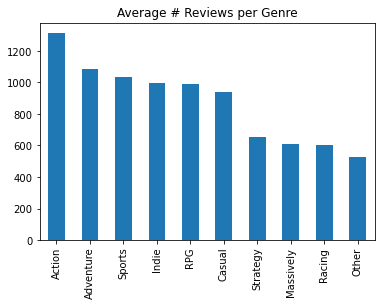

In [204]:
data = {'Action':1314, 'Indie':995, 'Adventure':1086, 'RPG': 988, 'Strategy':655, 'Casual':941, 'Massively':610, 'Sports':1034, 'Racing':604, 'Other':525}
df = pd.DataFrame.from_dict(data, orient='index', columns=['Reviews_per_game'])
df.sort_values('Reviews_per_game', ascending=False, inplace=True)
print(df)
df.plot(kind='bar', legend=False, title="Average # Reviews per Genre")

In [ ]:
# Average review score by genre

for col in columns_add:
    reviews = reviews_3up[col].sum()  # sum genres
    games = reviews_3up[['appid', col]][reviews_3up[col]==1].groupby('appid').sum().count()  # count games
    print(reviews, games, "Average reviews per game:  ", reviews/games )

In [214]:
genre_rates = games_100up.merge(steamspy_data, on='appid').groupby('genre').agg(up_sum=pd.NamedAgg(column='up', aggfunc=sum),
                                                                  down_sum=pd.NamedAgg(column='down', aggfunc=sum))

In [216]:
genre_rates.reset_index(inplace=True)

In [245]:
cols = ['genre', 'score']
lst = []
for col in columns_add:
    if col != "Other":
        up_total = genre_rates.loc[genre_rates.genre.str.contains(col)].up_sum.sum()
        down_total = genre_rates.loc[genre_rates.genre.str.contains(col)].down_sum.sum()
        genre_rate = up_total / (up_total + down_total)
        lst.append([col, genre_rate])
genre_score = pd.DataFrame(lst, columns=cols)    

        genre     score
1       Indie  0.912791
6      Casual  0.911528
5  Simulation  0.892680
3         RPG  0.891569
0      Action  0.887069
2   Adventure  0.885228
4    Strategy  0.881766
9      Racing  0.838502
8      Sports  0.831277
7   Massively  0.757235


<AxesSubplot:title={'center':'Review Rate by Genre'}>

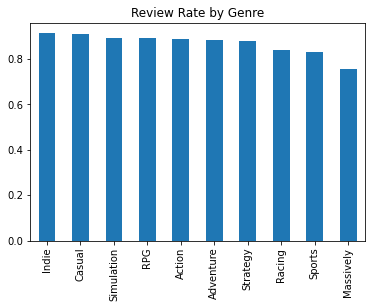

In [259]:
print(genre_score.sort_values('score', ascending = False))
genre_score.sort_values('score', ascending = False).plot(kind='bar', legend=False, title="Review Rate by Genre", x='genre', xlabel="")

## Text Processing

In [ ]:
games_100up.reset_index(inplace = True)
games_100up.set_index('appid', inplace = True)
named_df.set_index('appid', inplace=True)

In [ ]:
# Reviews of games with at least 100 reviews
reviews_100up = named_df.filter(['recommendationid', 'review'])[named_df.index.isin(games_100up.index)]

In [4]:
reviews_100up['clean'] = reviews_100up['review']

In [5]:
# Replace newline with space, apostrophe without space

def new_line(row):
    text = row['clean']
    for ch in ['\n','[h1]','[/h1]','[b]','[/b]','[i]','[/i]']:
        if ch in text:
            text = text.replace(ch, ' ')
    return text
            
reviews_100up['clean'] = reviews_100up.apply(new_line, axis=1)

reviews_100up['clean'] = reviews_100up['clean'].str.replace("'", '')

In [6]:
# Remove remaining symbols

def clean_symbols(row):
    new_string = re.sub('[^a-zA-Z]', ' ', row['clean'])
    return new_string

reviews_100up['clean'] = reviews_100up.apply(clean_symbols, axis=1)

In [7]:
# Lowercase, remove leading, trailing spaces, drop blank reviews
reviews_100up['clean'] = reviews_100up['clean'].str.lower()
reviews_100up['clean'] = reviews_100up['clean'].str.strip()
reviews_100up['clean'].replace('', np.nan, inplace=True)
reviews_100up.dropna(subset=['clean'], inplace=True)

In [8]:
# String length
reviews_100up["str_len"] = reviews_100up['clean'].str.len()

Text(0.5, 1.0, 'Review String Length')

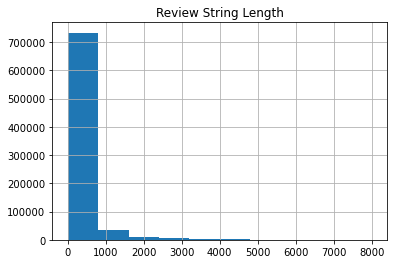

In [80]:
reviews_100up['review'].str.len().hist()
plt.title("Review String Length")

In [81]:
# very long and very short comments
reviews_100up.sort_values('str_len', ascending=False)

,appid,recommendationid,review,clean,str_len,words,word_count
37343,400,40835632,YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,yaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,8000,['yaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1
439216,225540,71973339,EPIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,epiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii...,8000,['epiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii...,1
568474,629760,54834998,yuo fight with sord fun very fun it makes me h...,yuo fight with sord fun very fun it makes me h...,8000,"['yuo', 'fight', 'with', 'sord', 'fun', 'very'...",1670
522296,524220,75142818,DemomanDemomanDemomanDemomanDemomanDemomanDemo...,demomandemomandemomandemomandemomandemomandemo...,8000,['demomandemomandemomandemomandemomandemomande...,1
119863,4000,43823078,abcdefghijklmnopqrstuvwxyz now i no my abcdefg...,abcdefghijklmnopqrstuvwxyz now i no my abcdefg...,8000,"['abcdefghijklmnopqrstuvwxyz', 'now', 'i', 'no...",1016
...,...,...,...,...,...,...,...
264139,41000,72654533,Eh,eh,2,['eh'],1
60802,550,70256590,Ee,ee,2,['ee'],1
503004,312530,75150653,sd,sd,2,['sd'],1
778121,1172380,58035480,eh.,eh,2,['eh'],1


In [9]:
# Remove excessive repeating letters, like amaaazzzziiiiing, leaves two, the English maximum
def reduce_lengthening(row):
    text = row['clean']
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [10]:
# Repeating letters
reviews_100up['short'] = reviews_100up.apply(reduce_lengthening, axis=1)

In [11]:
# tokenize unique words in order

def identify_tokens(row):
    review = row['short']
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalpha()]
    token_words_once = list(dict.fromkeys(token_words)) # unique list
    return token_words_once

In [12]:
# Word tokenize
reviews_100up['words'] = reviews_100up.apply(identify_tokens, axis=1)

In [13]:
def word_count(row):
    my_list = row['words']
    count_list = len(my_list)
    return (count_list)

In [14]:
reviews_100up['word_count'] = reviews_100up.apply(word_count, axis=1)

In [141]:
def word_unique(row):
    my_list = row['words']
    count_list = len(set(my_list))
    return (count_list)

In [142]:
# reviews_100up['word_unique'] = reviews_100up.apply(word_unique, axis=1)

In [15]:
# Update new string length
def str_length(row):
    my_list = row['words']
    str_join = " ".join(str(w) for w in my_list)
    return len(str_join)

reviews_100up["str_len"] = reviews_100up.apply(str_length, axis=1)
#reviews_100up['short'].str.len()

In [16]:
# Remove single letter reviews
indexSingles = reviews_100up[(reviews_100up['str_len'] == 1) &
                (reviews_100up['word_count'] == 1)].index

reviews_100up.drop(indexSingles, inplace=True)

In [17]:
# Remove large single-word reviews
indexLargeSingles = reviews_100up[(reviews_100up['str_len'] > 14) &
                (reviews_100up['word_count'] == 1)].index

reviews_100up.drop(indexLargeSingles, inplace=True)

In [18]:
# Remove unserious reviews, very long, few words
reviews_100up = reviews_100up.drop(reviews_100up[(reviews_100up.str_len >=1000) & (reviews_100up.word_count <= 10)].index)

In [19]:
# Remove reviews 2 characters, except "ya", "no", "ok", "ez", "so", "eh", "og" (original gangsta)
indexDoubles = reviews_100up[(reviews_100up['str_len'] == 2) &
                (reviews_100up['word_count'] == 1) & (~reviews_100up['short'].isin(['ok', 'ya', 'no', 'eh', 'so', 'og', 'fu', 'ez']))].index

reviews_100up.drop(indexDoubles, inplace=True)

In [276]:
#backup = reviews_100up.copy()

In [284]:
#reviews_100up = backup.copy()

In [20]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ggibs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ggibs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Check any words are in dictionary
def in_dictionary(row):
    in_dict = False
    my_words = row['words']
    for w in my_words:
        if w in setofwords:
            return True
        if w[:-1] in setofwords:  # likes or liked
            return True
        if w[:-2] in setofwords:  # ed
            return True
        if w[:-3] in setofwords:  # ing
            return True
        if wordnet_lemmatizer.lemmatize(w) in setofwords:
            return True
    return in_dict

In [22]:
reviews_100up['in_dict'] = reviews_100up.apply(in_dictionary, axis=1)

In [23]:
# If single word still not in dictionary, turn remaining double letters into singles
def reduce_lengthening1(row):
    if (row['in_dict'] == False) and (row['word_count'] == 1):
        text = row['words']
        pattern = re.compile(r"(.)\1{1,}")
        for w in text:
            newtext = [pattern.sub(r"\1", w.lower())]
        return(newtext)
    else:
        return(row['words'])

In [24]:
# Try again to check word is in dictionary
reviews_100up.words = reviews_100up.apply(reduce_lengthening1, axis=1)
reviews_100up['in_dict'] = reviews_100up.apply(in_dictionary, axis=1)

In [25]:
reviews_100up.recommendationid[reviews_100up.in_dict==True].count()

779826

In [26]:
reviews_100up.recommendationid[reviews_100up.in_dict==False].count()

11

In [27]:
# Remove reviews not in the dictionary
reviews_100up = reviews_100up.drop(reviews_100up[(reviews_100up.in_dict==False)].index)

yes        10891
good        9563
fun         4172
nice        2743
epic        1408
gud         1319
amazing     1159
cool        1138
great       1108
ok           903
classic      827
Name: root, dtype: int64


<AxesSubplot:title={'center':'Top Single Word Reviews'}>

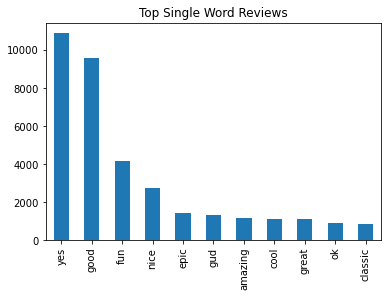

In [223]:
print(reviews_100up[reviews_100up.word_count==1]['short'].value_counts().head(11))
reviews_100up[reviews_100up.word_count==1]['short'].value_counts().head(11).plot(kind='bar', title = "Top Single Word Reviews")

In [244]:
# Average words per review
reviews_100up.word_count.mean()

29.466093727121166

## Review Sentiment Analysis


Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.   
Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [29]:
sa = SentimentIntensityAnalyzer()

def sentiment(row):
    review = row['clean']
    sa_dict = sa.polarity_scores(review)
    return sa_dict['compound']

In [30]:
reviews_100up['score'] = reviews_100up.apply(sentiment, axis=1)

In [258]:
reviews_100up.set_index(['appid', 'recommendationid'], inplace = True)

In [31]:
reviews_100up.score.mean()

0.3588257938309315

In [281]:
reviews_3up.reset_index(inplace = True)
reviews_3up.set_index(['appid', 'recommendationid'], inplace = True)

In [282]:
game_score = pd.merge(reviews_100up, reviews_3up, on=['appid', 'recommendationid'], how='left')
#groupby('appid').agg(game_score = pd.NamedAgg(column = 'score', aggfunc = 'mean'))

In [289]:
for col in columns_add:
    print(col, ":  ", game_score[game_score[col] == 1]['score'].mean())

Action :   0.3570005798855711
Indie :   0.3885615203039924
Adventure :   0.3979905113115085
RPG :   0.41153640892301707
Strategy :   0.3887431099242067
Simulation :   0.39082537349487145
Casual :   0.3578514178048323
Massively :   0.28820427342689003
Sports :   0.33466152327468957
Racing :   0.43513345228291705
Other :   0.34280857572718154


            Genre_Sentiment
Racing              0.43500
RPG                 0.41150
Adventure           0.39799
Simulation          0.39080
Strategy            0.38870
Indie               0.38856
Casual              0.35785
Action              0.35700
Sports              0.33466
Massively           0.28820


<AxesSubplot:title={'center':'Sentiment Scores per Genre'}>

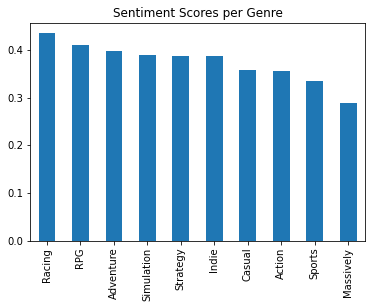

In [292]:
data = {'Action': 0.357, 'Indie': 0.38856, 'Adventure': 0.39799, 'RPG':0.4115, 'Strategy':0.3887, 'Simulation':0.3908, 'Casual':0.35785, 'Massively':0.2882, 'Sports':0.33466, 'Racing':0.435}
df = pd.DataFrame.from_dict(data, orient='index', columns=['Genre_Sentiment'])
df.sort_values('Genre_Sentiment', ascending=False, inplace=True)
print(df)
df.plot(kind='bar', legend=False, title="Sentiment Scores per Genre")

In [ ]:
df = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')

In [298]:
game_score = game_score.merge(steamspy_data, on = 'appid', how = 'left')

In [304]:
game_score.groupby('name').agg(game_score = pd.NamedAgg(column='score', aggfunc = 'mean')).sort_values('game_score',ascending = False).tail(10)

,game_score
name,
Hurtworld,0.072809
BROKE PROTOCOL: Online City RPG,0.072273
Getting Over It with Bennett Foddy,0.067597
Sniper: Ghost Warrior,0.047142
F.E.A.R. 3,0.045863
Ace of Spades: Battle Builder,0.039353
Doom 3: BFG Edition,0.036998
Kane & Lynch 2: Dog Days,0.007515
Just Survive,-0.034020


In [5]:
scores = pd.DataFrame(game_score.groupby('name')['score'].mean())

Text(0.5, 1.0, 'Distribution of Game Review Sentiment Scores')

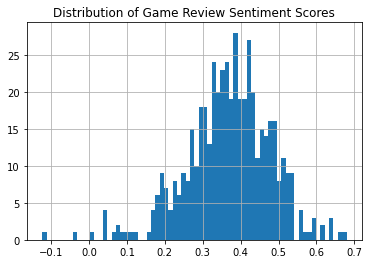

In [10]:
scores['score'].hist(bins=70)
plt.title("Distribution of Game Review Sentiment Scores")
# plt.figure(figsize=(10,4))

In [305]:
# Why are review sentiments so low?  Gaming words:

print(sa.polarity_scores('kill')['compound'])
print(sa.polarity_scores('terrorist')['compound'])
print(sa.polarity_scores('villains')['compound'])
print(sa.polarity_scores('apocalyptic')['compound'])
print(sa.polarity_scores('shoot')['compound'])
print(sa.polarity_scores('death')['compound'])
print(sa.polarity_scores('battle')['compound'])
print(sa.polarity_scores('destroy')['compound'])
print(sa.polarity_scores('neutralize')['compound'])

-0.6908
-0.6908
-0.6597
-0.6597
-0.34
-0.5994
-0.3818
-0.5423
0.0


In [108]:
# Generate unique list of review words
all_words_list = list(set([w for l in reviews_100up.words.tolist() for w in l]))
len(all_words_list)

177260

In [110]:
words_df = pd.DataFrame(all_words_list, columns=['word'])

In [19]:
def sentiment2(row):
    review = row['word']
    sa_dict = sa.polarity_scores(review)
    return sa_dict['compound']

In [128]:
words_df['score'] = words_df.apply(sentiment2, axis=1)

In [189]:
# Game words that make reviews very negative
words_df[words_df['score'] < 0].sort_values('score')

,word,score
129983,rapist,-0.7096
125745,slavery,-0.7003
38086,raping,-0.7003
42409,murder,-0.6908
97485,fu,-0.6908
...,...,...
136760,longing,-0.0258
144661,battleship,-0.0258
105570,sentenced,-0.0258
161756,freeloaders,-0.0258


In [32]:
# List of negative game words to avoid scoring sentiment
neg_game_words = ['kill', 'killed', 'killings', 'killing', 'killers', 'killer', 'terrorist', 'terrorists', 'terrorism', 'evil', 'evilly', 'evilness', 'villains', 'villain', 'villainess', 'apocalyptic', 'apocalypse', 'dead', 'death', 'die', 'died', 'corpse', 'fatality', 'fatalities', 'kia', 'violence', 'violent', 'violently', 'warmongers', 'warmonger', 'doomsday', 'assassinate', 'assassination', 'assassinations', 'assassinated', 'destroy', 'destruction', 'obliterate', 'war', 'battle', 'battles', 'battled', 'shoot', 'shooting', 'shooter', 'shooters', 'shot', 'attack', 'attackers', 'attacked', 'attacker', 'assault', 'assaulted', 'abduction', 'fire', 'fired', 'wars', 'villainy', 'prisoner', 'prisoners', 'prison', 'imprisoned',  'kills', 'threat', 'destructiveness', 'danger', 'threatening', 'threaten', 'casualty', 'destructively', 'evildoers', 'warred', 'conspiracy', 'abducted', 'destructions', 'destroyers', 'perpetrator', 'bomb', 'bombs', 'destructivity', 'enemies', 'enemy', 'defeat', 'defeated', 'fought', 'hostiles', 'attacking', 'destroyer', 'beating', 'beat', 'beaten', 'dangerous', 'villainous', 'contagion', 'abduct', 'abductions', 'foe', 'foes', 'destructful', 'decapitate', 'decapitates', 'stab', 'stabbed', 'stabs', 'weapons', 'fightings', 'blood', 'bleeding', 'attacks', 'disadvantage', 'devastation', 'threats', 'aggressiveness', 'destructibility', 'antagonist', 'antagonists', 'battlefield', 'defeating', 'fight', 'obstacles', 'adversities', 'adversaries', 'adversary', 'opponent', 'adversarial', 'devilishly', 'devil', 'collision', 'confrontations', 'fighting', 'obstacle', 'vicious', 'contagions', 'strike', 'hit', 'strikes', 'hits', 'scary', 'eerie', 'haunted', 'frighten', 'fright', 'contagious', 'gun', 'guns', 'suspects', 'suspect', 'scares', 'combat', 'smugglers', 'smuggler', 'victim', 'victims', 'confrontation', 'battlefront', 'aggression', 'weapon', 'warfare', 'shots', 'shoots', 'scare', 'ghost', 'ghosts', 'awol', 'graveyard', 'graveyards', 'graves', 'contentious', 'corpses', 'haunting', 'scream', 'screams', 'pileup', 'collidies', 'slashing', 'burn', 'burning', 'burns', 'rebel', 'rebellions', 'charge', 'charges', 'frights', 'battling', 'feudalistic', 'disguise', 'disguises', 'disguised', 'dark', 'darkness', 'weaponry', 'haunts', 'perpetrators', 'perptrated', 'revenge', 'aggressors', 'aggressor', 'vulnerability', 'vulnerable', 'slashed', 'slash', 'battlefields', 'rebels', 'combats', 'battlefronts', 'flee', 'flees', 'gravestone', 'gravestones', 'vulnerabilities', 'dreadnought', 'dreadnoughts', 'battleground', 'battlegrounds', 'challenges', 'challengingly', 'challenging', 'cutting', 'cut', 'cuts', 'slice', 'sliced', 'battleship', 'battleships', 'toughy', 'colliding', 'aggressive', 'warship', 'warships', 'rebellion', 'dominatrix', 'dominate', 'dominated', 'dominating', 'dominates', 'rigorous', 'rigorously', 'ferocious', 'ferociously', 'pressurised', 'pressurized', 'pressure', 'stealth', 'stealths', 'tough', 'toughest', 'promiscuous', 'collisions', 'collide', 'serious', 'hurtle', 'battlements', 'nerves', 'challenge', 'challenged', 'nazi', 'nazis', 'lowrider', 'warsaw', 'toughness', 'seriousness', 'defense', 'defence', 'defenses', 'defences', 'fighters', 'domination', 'battlers', 'unmatched', 'thwarted', 'unbiased', 'chilling', 'chillingly', 'flirtatiously', 'flirt', 'flirtatious', 'lowlands', 'tranquilizer', 'tranquilizers', 'tranquilize', 'tranquilized', 'casualties', 'conspiracies', 'murder', 'murders', 'murderer', 'murdering', 'murdered', 'murderers', 'murderous', 'murderously', 'terrorized', 'terrorize', 'terrorise', 'terrorising', 'terrorizing', 'devistate', 'devistators', 'devils', 'evils', 'totalitarianism', 'warmongering', 'viciousness', 'doom']

In [33]:
neg_game_words.sort()
len(neg_game_words)

304

In [ ]:
# words_df[~words_df['word'].isin(neg_game_words)].sort_values('score')[:10]

In [257]:
# reviews_100up['game_words'] = np.where((reviews_100up.short.isin(testwords)), 1, 0)

In [321]:
# Use this section to check how certain words are used within reviews

def game_words(row):
    my_list = row['words']
    for w in my_list:
        if w in checkwords:
            return 1

checkwords=['destroy', 'destroys', 'destroyed', 'destroying']
reviews_100up['game_words'] = 0
reviews_100up['game_words'] = reviews_100up.apply(game_words, axis=1)
pd.set_option('display.max_colwidth',1000)
reviews_100up['short'][reviews_100up.game_words == 1].head(20)

28                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   lol so old and the graphics are so ugly yet i still somehow love them  no joke  heck yes this game is still playable however  mins a day maximum and then you will get bored and play it next week again and keep going like this  this old game that me and my so now called friends used to play became cs go  which is also enjoyable but they destroyed the game and they still do  i mean yeah  is still playable  just dont play alone  play with friends  omg i just realized i have played over  hours while writting  screams  mom get the

In [34]:
# replace negative games words with neutral nonsense word

def replace_game_words(row):
    my_list = row['words']
    keep_words = ['zabs' if w in neg_game_words else w for w in my_list]
    return (keep_words)

reviews_100up['words'] = reviews_100up.apply(replace_game_words, axis=1)

In [35]:
# put the review string back together

def rebuild_string(row):
    my_list = row['words']
    str_join = " ".join(str(w) for w in my_list)
    return str_join

reviews_100up['rebuild'] = reviews_100up.apply(rebuild_string, axis=1)

In [36]:
# rescore sentiment for new mean

def sentiment3(row):
    review = row['rebuild']
    sa_dict = sa.polarity_scores(review)
    return sa_dict['compound']

reviews_100up['rescore'] = reviews_100up.apply(sentiment3, axis=1)
reviews_100up.rescore.mean()

0.40716812853123663

In [32]:
# which words are still holding back the mean sentiment?
# count review words and add sentiment score

from collections import Counter
from itertools import chain

counter = Counter(chain.from_iterable(map(str.split, reviews_100up.rebuild.tolist()))) 
word_weight = pd.DataFrame.from_dict(counter, orient='index').reset_index()
word_weight = word_weight.rename(columns={'index':'word', 0:'freq'})
word_weight['score'] = word_weight.apply(sentiment2, axis=1)
word_weight.sort_values(by='score', ascending=True).head()

,word,freq,score
27791,rapist,14,-0.7096
13172,slavery,109,-0.7003
26712,raping,31,-0.7003
7279,fu,465,-0.6908
1216,rape,181,-0.6908


In [35]:
# negative words weighted by frequency

word_weight['weight'] = word_weight['score'] * word_weight['freq']
word_weight.sort_values(by='weight', ascending=True).head()

,word,freq,score,weight
23,no,83455,-0.2960,-24702.6800
137,bad,44849,-0.5423,-24321.6127
942,shit,14698,-0.5574,-8192.6652
1145,hell,10656,-0.6808,-7254.6048
2404,doom,18041,-0.4019,-7250.6779


## Output data for model

In [37]:
# replace "bad guy" with nonsense word

def bad_guy(row):
    str = row['rebuild']
    new_string = str.replace("bad guy", "zab")
    #new_string = re.sub('[^a-zA-Z]', ' ', row['clean'])
    return new_string

reviews_100up['rebuild'] = reviews_100up.apply(bad_guy, axis=1)
reviews_100up['rescore'] = reviews_100up.apply(sentiment3, axis=1)
reviews_100up.rescore.mean()

0.4073912035505357

In [39]:
reviews_100up[['rebuild', 'rescore']].sort_values(by='rescore', ascending = False)

,rebuild,rescore
269028,this is my review about the action rts zabs li...,0.9998
635410,temtem is a refreshing but familiar take on th...,0.9995
207483,the witcher assassins of kings enhanced editio...,0.9995
516389,a masterpiece and this generation s final fant...,0.9994
471241,how to survive review a zombie survival advent...,0.9994
...,...,...
538280,got this for not expecting much considering th...,-0.9972
370821,i would recommend playing it just to finish up...,-0.9973
557865,while fun from time to it mostly is a disaster...,-0.9975
544944,originally i thought this might be a good game...,-0.9976


In [38]:
# merge new scores and genre data
game_sentiment = reviews_100up[['appid', 'recommendationid', 'rescore']]
game_sentiment.set_index(['appid', 'recommendationid'], inplace = True)
game_sentiment.to_csv(os.path.join(path_interim, "game_sentiment.csv"))

In [43]:
reviews_3up.reset_index(inplace=True)
reviews_3up.set_index(['appid', 'recommendationid'], inplace = True)

In [44]:
game_model = pd.merge(game_sentiment, reviews_3up, on=['appid', 'recommendationid'], how='left')

In [45]:
game_model.drop(['language', 'review', 'votes_up', 'votes_funny', 'weighted_vote_score', 'timestamp_updated', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.last_played'], axis=1, inplace=True)

In [46]:
# output for modeling notebook
game_model.to_csv(os.path.join(path_interim, "game_model.csv"))